#3. 線形回帰モデルと最小二乗法

## 3.1 データの可視化と線形回帰モデルによる分析

###3.1.1 データの可視化

In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [2]:
%cd '/content/mount/MyDrive/SDS'

/content/mount/MyDrive/SDS


In [3]:
!pip install -q folium
!pip install -q statsmodels

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from statsmodels.formula.api import ols
from sklearn.datasets import fetch_california_housing

import scipy.stats as st
import numpy.linalg as LA

In [5]:
# カリフォルニア住宅価格データセットの読み込み
california_data = fetch_california_housing()
# データセットの構成の確認
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
california_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
# データフレームの作成
df_X = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df_y = pd.DataFrame(california_data.target, columns=california_data.target_names)
df = df_X.join(df_y)

In [8]:
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<ipython-input-10-81461e9af783>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=20, ax=ax)


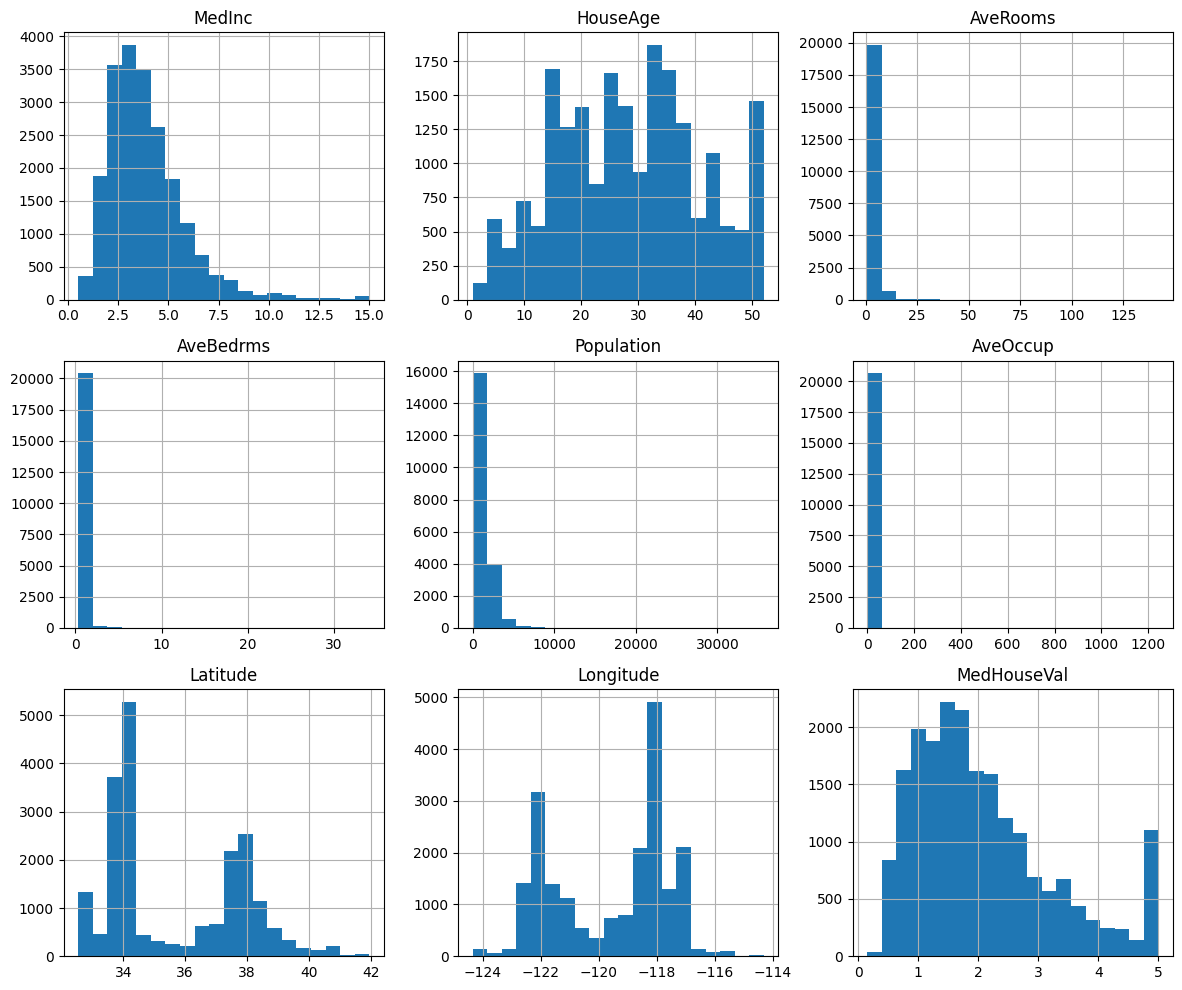

In [10]:
fig, ax = plt.subplots(figsize=(12,10))

df.hist(bins=20, ax=ax)

plt.tight_layout()
fig.savefig("./Chapter3/figures/histgram.png")
plt.show()

In [11]:
# californiaの中心緯度経度
lat = df['Latitude'].mean()
lon = df['Longitude'].mean()
center = (lat, lon)

# 地図表示のベースマップ(OpenStreetMap)を作成
map = folium.Map(location=center, zoom_start=5)
map

In [12]:
# ヒートマップ作成用のデータフレームの作成(緯度・経度・住宅価格)
HeatMapData = df.loc[:,['Latitude','Longitude', 'MedHouseVal']]

# ヒートマップの表示
map = folium.Map(location=center, zoom_start=6)  # ベースマップの作成
plugins.HeatMap(data=HeatMapData.values, name='MedHouseVal', radius=3, blur=3).add_to(map)  # ヒートマップの重ね合わせ
folium.LayerControl().add_to(map)  # レイヤーコントロールの付加
map  # 図示

##3.1.2 statsmodelsによる線形回帰分析

In [13]:
# statsmodelsで重回帰分析
formula = 'MedHouseVal ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup'
model = ols(formula, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:10:45   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4391      0.028    -15.918      0.0

##3.2 最小二乗法の理論と推定結果の各項目の確認

###3.2.1 係数パラメータを求める

In [14]:
# 説明変数のデータフレームをnp.arrayに変換する
data = df_X.loc[:, ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']].values
# 定数項の列(すべて1)を作成する
intercept = np.ones(data.shape[0]).reshape([-1, 1])
# 2つの配列を水平方向に結合する
X = np.hstack([intercept, data])

# 被説明変数のデータフレームをnp.arrayに変換する
y = df_y.values.reshape([-1, 1])

# データサンプル数(N)と係数パラメータ数(K)
N = X.shape[0]
K = X.shape[1]

In [15]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_hat)

[[-4.39093421e-01]
 [ 5.36910326e-01]
 [ 1.65033593e-02]
 [-2.11740382e-01]
 [ 9.93729775e-01]
 [ 2.21093787e-05]
 [-4.87715048e-03]]


###3.2.2 分散パラメータを求める

In [16]:
# 誤差項の分散の推定値を求める
# ハット行列
S = X @ np.linalg.inv(X.T @ X) @ X.T
# 理論値
y_hat = S @ y
# 残差
e = y - S @ y

In [17]:
# 残差平方和
sigma2 = e.T @ e / (N - K)
# 誤差項の分散の推定値
sigma2 = (sigma2[0,0])
# 確認
print(sigma2)

0.6131235588613448


###3.2.3 パラメータの有意性検定の指標を求める

In [18]:
# 係数パラメータ推定値の標準誤差を求める
se_beta = np.sqrt(np.diag(sigma2 * np.linalg.inv(X.T @ X)))
print(se_beta)

[2.75841006e-02 4.12428350e-03 4.63956245e-04 6.00908189e-03
 2.95145841e-02 5.09754976e-06 5.26570701e-04]


In [19]:
# 95%信頼区間を求める
rv = st.t(N - K)

interval_low = np.asarray(beta_hat).flatten() - rv.isf(0.025) * se_beta
interval_high = np.asarray(beta_hat).flatten() - rv.isf(0.975) * se_beta

print(interval_low)
print(interval_high)

[-4.93160437e-01  5.28826405e-01  1.55939684e-02 -2.23518657e-01
  9.35878860e-01  1.21177787e-05 -5.90927063e-03]
[-3.85026406e-01  5.44994247e-01  1.74127502e-02 -1.99962107e-01
  1.05158069e+00  3.21009788e-05 -3.84503033e-03]


In [20]:
# パラメータのt値を求める
t_value = np.asarray(beta_hat).flatten() / se_beta
print(t_value)

[-15.91835195 130.18269141  35.57093897 -35.23672769  33.66910992
   4.33725609  -9.26209999]


In [21]:
# p値を求める
p_value = 1 - rv.cdf(np.abs(t_value))
print(p_value)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.24784386e-06 0.00000000e+00]


###3.2.4 モデルの評価基準

### 決定係数/自由度修正済み決定係数

In [22]:
# 決定係数
# 全変動
total_var = np.sum((np.asarray(y).flatten() - np.mean(y))**2)
# 回帰変動
exp_var = np.sum((np.asarray(y_hat).flatten() - np.mean(y))**2)
# 残差変動
unexp_var = np.sum(np.asarray(e).flatten()**2)

# 決定係数
R2 = 1 - unexp_var/total_var
print(R2)

0.5396977345638281


In [23]:
# 自由度調整済み決定係数
adjR2 = 1 - (unexp_var/(N-K))/(total_var/(N-1))
print(adjR2)

0.5395638803694494


### F検定

In [24]:
# F値を求める
F_value = (exp_var/(K-1)) / (unexp_var/(N-K))
print(F_value)

4031.982240591311


In [25]:
# p値を求める
rv = st.f((K-1), (N-K))
Prob_F = 1 - rv.cdf(F_value)
print(Prob_F)

1.1102230246251565e-16


### 最大対数尤度

In [26]:
# 最大対数尤度を求める
rv = st.norm(y_hat, np.sqrt(unexp_var/N))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)

-24234.96232451307


### AIC(赤池情報量規準)

In [27]:
# AICを求める
aic = (-2.0) * mll + 2.0 * K
print(aic)

48483.92464902614


### BIC(ベイズ情報量規準)

In [28]:
# BICを求める
bic = (-2.0) * mll + np.log(N) * K
print(bic)

48539.469552563314


###3.2.5 モデルの妥当性基準

### 正規性の検定(Omunibus検定・Jarque-Bera検定)

In [ ]:
# Omunibus検定
Omunibus_test = st.normaltest(e)  # 残差eを引数とする
# jarque-Bera検定
JB_test = st.jarque_bera(e)  # 残差eを引数とする

print(Omunibus_test)
print(JB_test)

NormaltestResult(statistic=array([4480.62993608]), pvalue=array([0.]))
SignificanceResult(statistic=16778.76629746217, pvalue=0.0)


### 歪度・尖度

In [29]:
# 歪度
skewness = st.skew(e)
# 尖度
kurtosis = st.kurtosis(e, fisher=False)

print(skewness)
print(kurtosis)

[1.05256344]
[6.8831217]


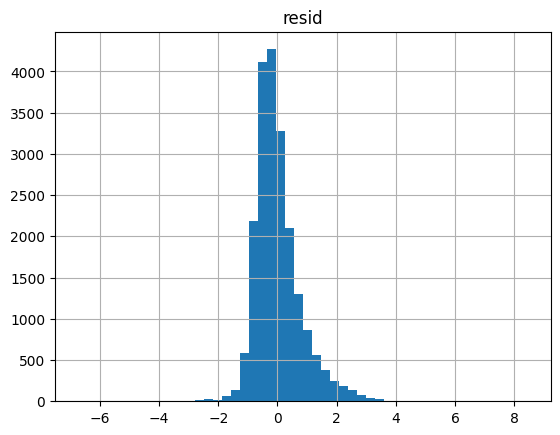

In [30]:
# 残差をデータフレーム化
df_e = pd.DataFrame(e, columns=['resid'])

df_e.hist(bins=50)  # pandasデータフレームからヒストグラムを直接作成
plt.savefig("./Chapter3/figures/skew_kurt.png")
plt.show()

### ダービン・ワトソン比

In [31]:
# ダービン・ワトソン比(np.diff( ,1)で一階の階差をとる)
DW_ratio = np.sum(np.diff(np.asarray(e).flatten(), 1)**2) / np.sum(np.asarray(e).flatten()**2)
print(DW_ratio)

0.9396612948079925


### 条件数(Cond. No.)

In [32]:
# 固有値を求める(eigメソッドの返り値は固有値、固有ベクトルの順)
w, v = LA.eig(X.T @ X)

# 定義式に従って条件数を求める
cond_num = np.sqrt(w.max() / w.min())
print(f'{cond_num:.3g}')  # 上3桁まで表示

1.16e+04
